
#### Importing the necessary libraries required 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
df.shape

(1372, 5)

In [18]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


 No missing values.

### EXPLORATORY DATA ANALYSIS

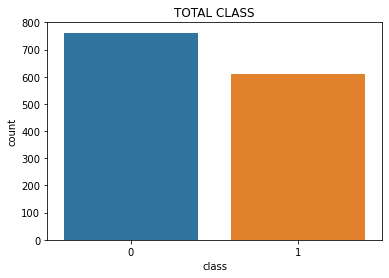

In [5]:
sns.countplot(df['class'])
plt.title('TOTAL CLASS')
plt.show()

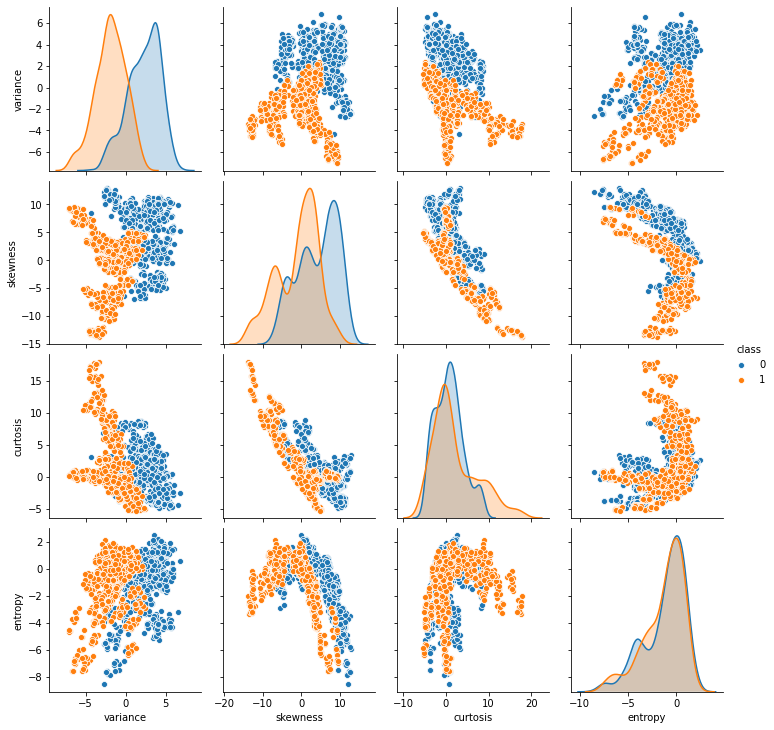

In [7]:
sns.pairplot(df, hue="class")
plt.show()

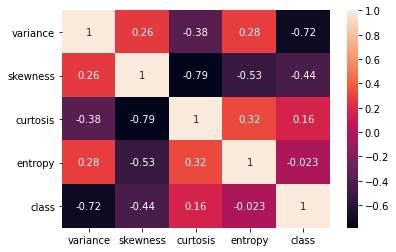

In [8]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

There is multicollinearity between curtios and skewness but we can ignore it.

In [11]:
features = list(df.columns)
features.remove('class')

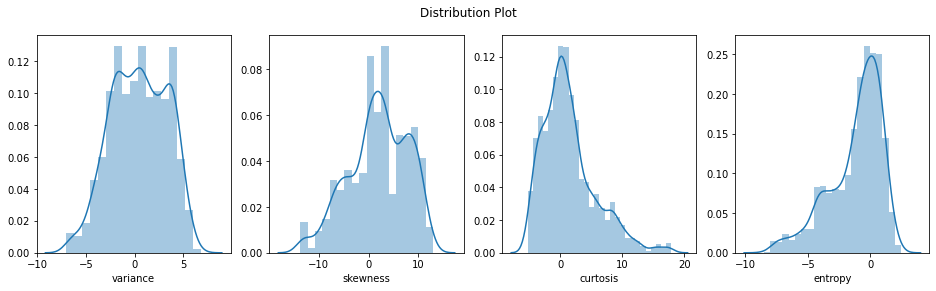

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")
for index, feature in enumerate(features):
    sns.distplot(df[feature], ax=ax[index])

There are outliers in curtosis and entropy .
Here the data is not normalized.

### plotting box plot to visualize outliers presnt in data

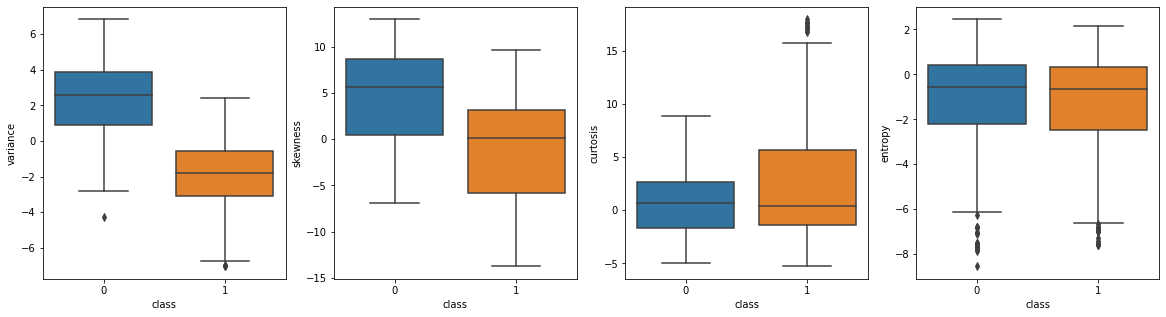

In [14]:
ig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle(" Features V/S Class",fontsize=17)

for index, feature in enumerate(features):
    sns.boxplot(x="class", y=feature, data=df, ax=ax[index])

####  MODEL CREATION :

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [20]:
Rf=RandomForestClassifier()

In [22]:
Rf.fit(X_train,y_train)
predict=Rf.predict(X_test)

In [32]:
print('Random Forest Train Accuracy Score:',Rf.score(X_train,y_train)*100)

Random Forest Train Accuracy Score: 100.0


In [33]:
print('Random Forest Test Accuracy Score :',accuracy_score(y_test,predict)*100)

Random Forest Test Accuracy Score : 98.1785063752277
